<a href="https://colab.research.google.com/github/ArjunRAj77/Discharge-summary-extractor/blob/main/Discharge_Summary_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discharge Summary Extractor

A streamlit application which uses to identify various problems and medications provided in the 'input discharge summary PDF ' using NLP model , deployed using Google Collab.


We will start with installing required libraries and modules:
- ngrok 
- streamlit
- pyPDF2
- medspacy [0.2.0.1]


In [ ]:
pip install ngrok

Since we need to deploy streamlit application in web, we require a tunneling service to forward the port link.

Firstly it needs to be connected to your application using auth token!

for reference: [Deploying streamlit application from Google Collab](https://faun.dev/c/stories/neji_14/how-to-create-and-launch-a-streamlit-app-directly-from-google-colab/)

In [ ]:
!./ngrok authtokens 2I25bavkwHYELR9tekrQDh8hpX7_e4JXyMTiF1UdcvBXdF7n

/bin/bash: ./ngrok: No such file or directory


In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://63ac-35-234-17-222.ngrok.io" -> "http://localhost:80">

In [ ]:
pip install streamlit

In [ ]:
pip install pyPDF2

In [ ]:
pip install spacy_streamlit

In [ ]:
pip install medspacy==0.2.0.1

Once the dependant libraries and modules are installed, we can directly write the necessary code for streamlit application.

Note: upload the datasets [ druglist.csv and diseaselist.csv] to the Files section in Google Collab.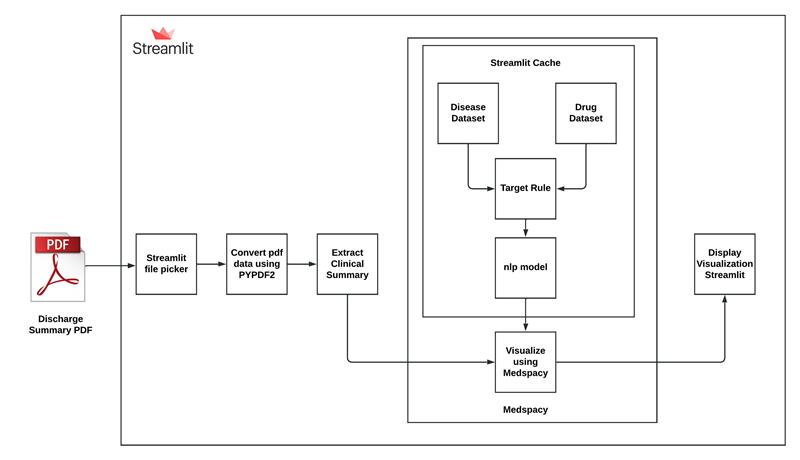

In [ ]:



# Importing libraries

import pandas as pd
import streamlit as st
import spacy_streamlit
import spacy
from spacy import displacy
from PyPDF2 import PdfReader
import medspacy
from medspacy.ner import TargetRule
from medspacy.visualization import visualize_ent
from spacy_streamlit import visualize_parser


st.title('Discharge Summary Extractor')
uploaded_file = st.file_uploader("Choose a file")

@st.cache(allow_output_mutation=True)
def loading_ml_model(): 

  #problemlist=["allergies","asthma","diabetes"]
  #medilist=["Claritin","Zyrtec","Ortho Tri-Cyclen","Allegra"]

  #Getting disease list
  diseasedf = pd.read_csv('/content/diseasedataset.csv')
  diseaselist = diseasedf['diseasename'].tolist()
  print("Completed loading disease dataset.")

  # Getting drug list
  drugdf = pd.read_csv('/content/drugdataset.csv')
  druglist = drugdf['drugName'].tolist()
  dglist=[]

  # Here we are only using 2000 drugs names as input to maintain 
  for x in druglist[:2000]:
      dglist.append(x)
  print("Completed loading drug dataset.")

  
  # Load medspacy model

  nlp = medspacy.load()
  print(nlp.pipe_names)
  print("Started adding rules to nlp model..........")
  # Add rules for target concept extraction
  target_matcher = nlp.get_pipe("medspacy_target_matcher")
  for i in diseaselist:
    for j in dglist:
      target_rules = [
        TargetRule(i, "PROBLEM"),   
        TargetRule(j, "MEDICATION")
            ]
      target_matcher.add(target_rules)
  print("Completed making rules in nlp model")
  return nlp

def post_processing(doc):

    problem_label=[]
    medication_label=[]
    for ent in doc.ents:
        if ent.label_=='PROBLEM':
          problem_label.append(ent)
        if ent.label_=='MEDICATION':
          medication_label.append(ent) 
    print(problem_label)
    print(medication_label)
    prob_len=len(problem_label)
    med_len=len(medication_label)
    st.subheader("Summary:")
    st.write(f" Total number of identified diseases/problems in the file : {prob_len}")
    st.write(f" Total number of identified medications prescribed in the file : {med_len}")
    pass

if(uploaded_file is not None):
  reader = PdfReader(uploaded_file)
  print("Successfully read the file!")
  nlp=loading_ml_model()
  print("Completed loading the NLP model.")
  st.markdown('**Successfully loaded NLP model.**')
  if st.button('Extract'):
    st.subheader('Extracted Data:')
    st.markdown('Note: _The  first page of PDF is only considered for processing_!')
    number_of_pages = len(reader.pages)
    page = reader.pages[0]
    text_data = page.extract_text()

    # Processing Data with nlp model

    doc = nlp(text_data)
    print("Extracted the data.")

    # Adding colors to the rules
    colors = {"PROBLEM": "orange", "MEDICATION": "green"}
    options = {"colors": colors}
    visualize_ent(doc)
    print("Starting visualization of the data....")

    # Visualization of extracted data
    html =displacy.render(doc, style="ent", page=True,options=options)
    st.components.v1.html(html, width=1000, height=1000, scrolling=True)
    print("Visualization Completed.")
    print("Calling post processing function")
    post_processing(doc)
     

Run the following command to deploy the streamlit app. 

It will produce a tunneling link, so that streamlit application can be accessed via internet.

In [ ]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501

[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.234.17.222:8501

npx: installed 22 in 5.257s
your url is: https://every-melons-sing-35-234-17-222.loca.lt
Successfully read the file!
Completed loading disease dataset.
Completed loading drug dataset.
['medspacy_pyrush', 'medspacy_target_matcher', 'medspacy_context']
Started adding rules to nlp model..........
Completed making rules in nlp model
Completed loading the NLP model.
Successfully read the file!
Completed loading the NLP model.
/usr/local/lib/python3.7/dist-packages/medspacy/common/medspacy_matcher.py:80: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  matches = self.matcher(doc)
Extracted the data.
<IPython.core.display.HTML object>
Starting visualization of the data....
Visualization Completed.
Calling post processing function
[Achilles tendo